In [27]:
import numpy as np 
import pandas as pd
from collections import Counter

df = pd.read_csv ('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
def partition( feature_matrix, target_vector, t, shuffle = True):
    """
    * Feature matrix (numpy array with rows representing data samples and columns representing features.),
    * Target vector (numpy array with labels corresponding to each row of the feature matrix)        
    """

    # shuffle (default=True) where shuffle is a boolean whether to shuffle the data prior to
    # partitioning. You will be required to use “shuffle=True” for this assignment

    # t where t is a real number to determine the size of partition. For example, if t is set to 
    # 0.2, then 80% of the data will be used for training and 20% for testing

    # t must be a number between 0 and 1
    #this is not working yet
    if shuffle:
        shuffler = np.random.permutation(len(feature_matrix))
        feature_matrix = feature_matrix[shuffler]
        target_vector = target_vector[shuffler]
        
        #sort feature matrix and get indexes
        #use the index to sort the target vector
        #out_arr = np.argsort(feature_matrix)
        #feature_matrix = feature_matrix[out_arr]
        #target_vector = target_vector[out_arr]
        
        #np.random.shuffle(feature_matrix)
        #np.random.shuffle(target_vector)

    train_split_limit = int(1-t * len(feature_matrix))
    test_split_limit = int(1-t * len(feature_matrix))

    x_train = feature_matrix[:train_split_limit]
    x_test = feature_matrix[test_split_limit:]
       
   
    # split target_vector

    y_train = target_vector[:train_split_limit]
    y_test = target_vector[test_split_limit:]

    # This function should return two feature matrices for training and test data, 
    # and two target vectors for training and test data
    
    #print(y_train)
    return x_train, x_test, y_train, y_test


#x_train, x_test, y_train, y_test = partition(X, y, 0.2, True)

In [3]:
def minkowskiDistance(A, B, p=2):
    # This function will calculate the Minkowski distance
    # The default value for p is 2
    
    if len(A) == 0 or len(B) == 0:
        print("One of the vectores is empty")
        return None
    
    aux = []
    
    # First, iterate through each value of both arrays
    # Calculate the absolute of a-b
    # Elevate abs to p
    
    for x, y in zip(A, B):
        #print("x:",x)
        #print("y",y)
        aux.append(pow(abs(x-y),p))
        
    # Sum each of the values in the aux list
    
    sumatory = sum(aux)
    return pow(sumatory, 1/p)

In [4]:
class KNN_Classifier:
    
    def __init__(self, n_neighbors = 5, weights = 'uniform', p = 2):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p     
    
    def fit(self, X, Y):
            
        """
        X : ndarray A numpy array with rows representing data samples and columns representing features.
        Y : ndarray A 1D numpy array with labels corresponding to each row of the feature matrix X.
        """
        self.x_train = X
        self.y_train = Y
        
    def predict(self, x_test):
        euc_dis = []
        
        for i in range(len(self.x_train)):
            # compute and store L2 distance
            #euc_dis.append([np.sqrt(np.sum(np.square(x_test - self.x_train[i, :]))), i])
            euc_dis.append([minkowskiDistance(x_test,self.x_train[i,:],self.p),i])

        # sort the list
        #euc_dis = sorted(euc_dis)
        euc_dis.sort()
        
        temp_target = []
        
        # make a list of the k neighbors' targets
        for i in range(self.n_neighbors): # k
            index = euc_dis[i][1]
            temp_target.append(self.y_train[index])

        # return most common target
        return Counter(temp_target).most_common(1)[0][0]

        
    
    def predict_proba(self, X):
        """
        X: ndarray A numpy array containing samples to be used for prediction. Its rows represent data
        samples and columns represent features.
        Returns: 1D array of prediction probabilities for positive class for each row in X. The 1D
        array should be designed as a column vector.
        """
    
    def get_params(self):
        """
        Returns: dict Model parameter names mapped to their values.
        """
        
        return {
                "n_neighbors" : n_neighbors,
                "weights" : weights,
                "p": p
               }
    
    def set_params(self, **params):
        """
        **params : dict A dictionary with the model parameter names to change mapped to their values
        """
        self.n_neighbors = params["n_neighbors"]
        self.weights = params["weights"]
        self.p = params["p"]        
    
    

In [206]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [7]:
#test based on correclation
#X = df[['alcohol','density']]

Y = df['quality']

X = df.drop(columns=['quality'])

#X = df.drop(columns=['quality',"fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates"])

#X = df['alcohol']

"""Y = []
for x in df['quality']:
    if x > 5:
        ## Good Wine
        Y.append(1)
    elif x<= 5:
        ## Bad Wine
        Y.append(0)
"""        

Y = np.asarray([0 if val <= 5 else 1 for val in Y])

## Make them as numpy array         
X = np.array(X)
Y = np.array(Y)

## Shuffle and split the data into training and test set
x_train, x_test, y_train, y_test = partition(X,Y,0.2,shuffle=True)

## Make them as numpy arrays 
#x_train = np.array(x_train)
#y_train = np.array(y_train)
#x_test = np.array(x_test)
#y_test = np.array(y_test)

In [8]:
cl = KNN_Classifier(5,'uniform',2)

cl.fit(x_train,y_train)

predictions=[]
for i in range(len(x_test)):
    predictions.append(cl.predict(x_test[i, :]))
    

predictions = np.array(predictions)



In [11]:
#x_train, x_test, y_train, y_test
#y_test
predictions

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,

In [12]:
#from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("The accuracy of our classifier is {}".format(100*accuracy))

NameError: name 'accuracy_score' is not defined

In [27]:
# TP = ((predictions == 1) & (y_test == 1)).sum()
# FP = ((predictions == 1) & (y_test == 0)).sum()

# precision = TP / (TP+FP)



"""
true_values = np.array([[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]])
predictions = np.array([[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]])

N = true_values.shape[1]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
precision = TP / (TP+FP)
"""

'\ntrue_values = np.array([[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]])\npredictions = np.array([[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]])\n\nN = true_values.shape[1]\naccuracy = (true_values == predictions).sum() / N\nTP = ((predictions == 1) & (true_values == 1)).sum()\nFP = ((predictions == 1) & (true_values == 0)).sum()\nprecision = TP / (TP+FP)\n'

In [217]:
#TP = ((predictions == 1) & (y_test == 1)).sum()
#FP = ((predictions == 1) & (y_test == 0)).sum()
#precision = TP / (TP+FP)

y_test

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,

In [13]:
## accuracy
def CalculateAccuracy(y_test,predictions):

    N = y_test.shape[0]

    #accuracy = (numpy.abs(y_pred_list - y_val_lst) < tolerance ).all(axis=(0,2)).mean()

    accuracy = ( y_test == predictions).sum() / N
    
    return accuracy


#accuracy


In [14]:
# rename function and rename attributes
def ComputeConfissionMatrix(y_test, predictions):

    TP = ((predictions == 1) & (y_test == 1)).sum()

    FP = ((predictions == 1) & (y_test == 0)).sum()

    FN = ((predictions ==0) & (y_test == 1)).sum()

    TN = ((predictions == 0) & (y_test == 0)).sum()

    return TP,FP,FN,TN

def CalculatePrecision(y_test, predictions):
    
    TP,FP,FN,TN = ComputeConfissionMatrix(y_test,predictions)
        
    precision = TP / (TP + FP)

    return precision

def CalculateRecall(y_test, predictions):
    
    TP,FP,FN,TN = ComputeConfissionMatrix(y_test,predictions)
            
    recall = TP / (TP + FN)

    return recall

def CalculateF1Score(y_test, predictions):
    recall = CalculateRecall(y_test, predictions)
    precision = CalculatePrecision(y_test, predictions)
    
    F1Score = 2/((1/recall) + (1/precision) )
    
    return F1Score

def CalculateSpecificity(y_test, predictions):
    TP,FP,FN,TN = ComputeConfissionMatrix(y_test,predictions)
    
    specificity = 0
    
    specificity = TN / (TN + FP)
   
    return specificity

In [15]:
precision = CalculatePrecision(y_test, predictions)
recall = CalculateRecall(y_test, predictions)
f1score = CalculateF1Score(y_test, predictions)

precision,recall,f1score

(0.7714285714285715, 0.8023774145616642, 0.786598689002185)

In [16]:
import matplotlib.pyplot as plt 

tpr = recall

specificity = CalculateSpecificity(y_test, predictions)

fpr = 1 - specificity


def plot_roc_curve(tpr,fpr,label='None'):
    #true positive rate is also called recall
    plt.plot(fpr, tpr)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    
#plot_roc_curve(fpr,tpr,'ROC Curve')


def roc_curve(y_true, y_prob, thresholds):

    fpr = []
    tpr = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    plt.plot(fpr, tpr)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    #return [fpr, tpr]


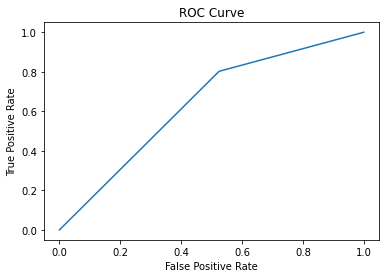

In [17]:
thresholds = np.arange(10)

# the function looks correct, the problem is that this function must use predict_proba data

roc_curve(y_test, predictions,thresholds)

In [183]:
#from sklearn.neighbors import KNeighborsClassifier
# split a dataset into train and test sets
#from sklearn.datasets import make_blobs
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [229]:
clf = KNeighborsClassifier(n_neighbors = 5)

In [230]:
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)

In [231]:
accuracy_sk = accuracy_score(y_test,predictions)

In [232]:
accuracy_sk

0.7229038854805726

In [166]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [29]:
X

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()
##scaler.mean_

X= scaler.transform(X)

In [30]:
x_train, x_test, y_train, y_test = partition(X,Y,0.2,shuffle=True)

cl = KNN_Classifier(5,'uniform',2)

cl.fit(x_train,y_train)

predictions=[]
for i in range(len(x_test)):
    predictions.append(cl.predict(x_test[i, :]))
    

predictions = np.array(predictions)

In [69]:
precision = CalculatePrecision(y_test, predictions)
recall = CalculateRecall(y_test, predictions)
f1score = CalculateF1Score(y_test, predictions)

precision,recall,f1score

x_train

array([[-0.18344508, -0.47865728, -0.1999175 , ...,  0.93872363,
         1.31581474,  0.15094166],
       [-1.48709922,  0.16628471, -1.10895244, ...,  0.14394366,
         1.66634084, -0.41793512],
       [ 1.71277913, -0.28021359,  1.28759423, ..., -1.04822629,
         0.26423642, -1.06808001],
       ...,
       [-0.06493106,  0.21589563, -0.36519658, ..., -1.04822629,
        -1.48839409,  1.93884012],
       [-0.30195909,  0.01745194, -0.28255704, ...,  0.34263866,
        -0.87497341, -0.82427568],
       [-0.77601514,  1.90266698, -1.19159198, ...,  0.21017533,
        -0.34918426,  1.45123145]])

In [148]:
p = 2

def calculateMinkowskiDistances(A,B):
    return pow(pow(abs(B - A),p).sum(axis=1),1/p)

    
    

In [149]:
k = 5
p = 2

#distances = calculateMinkowskiDistances(A,B)

res = []

for x in x_test:
    #distances = pow(abs(x_train - x),p).sum(axis=1)
    distances = calculateMinkowskiDistances(x_train,x)
    smallest_distances = distances.argsort()[:k]
    closest_labels = y_train[smallest_distances]
    count_labels = np.bincount(
        closest_labels,
        minlength=2
    )
            
    res.append(count_labels / count_labels.sum())

np.array(res)

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6]])

In [150]:
#predict proba

for x in x_test:
    distances = calculateMinkowskiDistances(x_train,x)
    smallest_distances = distances.argsort()[:k]
    closest_labels = y_train[smallest_distances]
    count_labels = np.bincount(
        closest_labels,
        minlength=2
    )
            
    res.append(count_labels / count_labels.sum())

np.array(res)

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6]])

In [151]:
# predict
res = []

for x in x_test:
    #distances = pow(abs(x_train - x),p).sum(axis=1)
    distances = calculateMinkowskiDistances(x_train,x)
    smallest_distances = distances.argsort()[:k]
    closest_labels = y_train[smallest_distances]
    res.append(closest_labels[0])
    
np.array(res)


array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,